In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from numpy import concatenate
from pandas import *
from sklearn.preprocessing import *
from sklearn.metrics import *
from tensorflow import keras
import tensorflow as tf
import time as t

In [2]:
#dataset = read_csv("folder/subfolder/dataToModel_5min.csv",index_col= 0,sep=";")


In [3]:
#dataset.head()

In [4]:
#dataset.info()

In [5]:
#dataset.drop(columns  = ['dz','go','ms','dz','fco2_MQ','rok'], inplace = True)

In [6]:
#dataset.head(2220)

In [7]:
#values = dataset.values
#values = values.astype('float64')

In [8]:
#scaler = MinMaxScaler(feature_range=(0, 1))
#scaled = scaler.fit_transform(values)
#scaled = pd.DataFrame(scaled)

In [9]:
#scaled.head(2220)

In [10]:
#dataset.info()

In [11]:
#dataset.shape

In [12]:
"""for w in range(32,33):
    start = t.time()
    list0 = []
    list1 = []
    i=0
    #w=6
    for window in scaled.rolling(window=w):
       # print(window.shape)
        if(window.shape==(w,window.shape[1])):
            i+=1
           # print("Number of window "+ str(i))
            list0.append(np.asarray(window.copy()))
            y=0
            shape = window.shape
            for index, test in window.iterrows() :
               # print(y)
                if (y==w-1) :
                   # print(test[0])
                    list1.append(test[0])
                    agroup=test[0]
                y+=1

    dataFromSensors=np.array(list0)
    np.save("dataFromSensors_"+str(w),dataFromSensors)
    labels=np.array(list1)
    np.save("labels_"+str(w),labels)
    stop=t.time()-start
    print(w,stop)"""

'for w in range(32,33):\n    start = t.time()\n    list0 = []\n    list1 = []\n    i=0\n    #w=6\n    for window in scaled.rolling(window=w):\n       # print(window.shape)\n        if(window.shape==(w,window.shape[1])):\n            i+=1\n           # print("Number of window "+ str(i))\n            list0.append(np.asarray(window.copy()))\n            y=0\n            shape = window.shape\n            for index, test in window.iterrows() :\n               # print(y)\n                if (y==w-1) :\n                   # print(test[0])\n                    list1.append(test[0])\n                    agroup=test[0]\n                y+=1\n\n    dataFromSensors=np.array(list0)\n    np.save("dataFromSensors_"+str(w),dataFromSensors)\n    labels=np.array(list1)\n    np.save("labels_"+str(w),labels)\n    stop=t.time()-start\n    print(w,stop)'

In [13]:
#print(list0)

In [14]:
#dataFromSensors=np.array(list0)

In [15]:
#np.save("dataFromSensors_"+str(w),dataFromSensors)

In [16]:
w=12

In [17]:
#print(dataFromSensors)
dataFromSensors=np.load("DataWithLabels/dataFromSensors_"+str(w)+".npy")

In [18]:
np.info(dataFromSensors)

class:  ndarray
shape:  (475325, 12, 16)
strides:  (1536, 128, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x242a1739040
byteorder:  little
byteswap:  False
type: float64


In [19]:
#print(list1)

In [20]:
#labels=np.array(list1)

In [21]:
#np.save("labels_"+str(w),labels)

In [22]:
labels=np.load("DataWithLabels/labels_"+str(w)+".npy")

In [23]:
#print(labels)

In [24]:
np.info(labels)

class:  ndarray
shape:  (475325,)
strides:  (8,)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x242ccf99040
byteorder:  little
byteswap:  False
type: float64


In [25]:
#values = reframed_df.values
#training_sample =int( len(dataset) *0.8)
training_sample_labels =int( len(labels) *0.8)
training_sample =int( len(dataFromSensors) *0.8)
#testDataset=DataFrame.to_numpy(dataset)
#testDataset=DataFrame.to_numpy(reframed_df)

In [26]:
training_sample_labels

380260

In [27]:
training_sample

380260

In [28]:
train_labels = labels[:training_sample]
train = dataFromSensors[:training_sample, : ,:]
test_labels = labels[training_sample:]
test = dataFromSensors[training_sample:, : , :]
# split into input and outputs
#train_X, train_y = train[:,:, 1:], train[:,:,0]
#test_X, test_y = test[:,:, 1:], test[:,:,0]
train_X, train_y = train[:,:, 1:], train_labels[:]
test_X, test_y = test[:,:, 1:], test_labels[:]

In [29]:
train_X.shape

(380260, 12, 15)

In [30]:
train_y

array([0., 0., 0., ..., 0., 0., 0.])

In [31]:
#print(train_X)

In [32]:
train_y.shape

(380260,)

In [33]:
#print(test_y)

In [34]:
train_y=train_y.reshape(train_y.shape[0],1)

In [35]:
test_y=test_y.reshape(test_y.shape[0],1)

In [36]:
#print(train_X)

In [37]:
# reshape input to be 3D [samples, time steps, features]
#train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1], train_X.shape[2]))
#test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1], test_X.shape[2]))



print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(380260, 12, 15) (380260, 1) (95065, 12, 15) (95065, 1)


In [38]:
model_gru =  keras.models.Sequential([
   # keras.layers.Conv1D(filters=64, kernel_size=3, strides=1, input_shape=(train_X.shape[1], train_X.shape[2])),
    keras.layers.GRU(128,return_sequences=True,input_shape=(train_X.shape[1],train_X.shape[2])),#,activation='relu'),
    #keras.layers.Flatten(),
   # keras.layers.GRU(units=128,return_sequences=True),
    #keras.layers.GRU(units=64,return_sequences=True,activation='relu'),
    #keras.layers.GRU(units=1,return_sequences=True),
    #keras.layers.Flatten(),
    
    keras.layers.GRU(units=64,return_sequences=True),#,activation='relu'),
    keras.layers.GRU(units=32),#,activation='relu'),
    #keras.layers.Flatten(),
    #keras.layers.BatchNormalization(),
   #
  #  keras.layers.GRU(units=3),
 
    #keras.layers.TimeDistributed(keras.layers.Dense(units=36))
    #keras.layers.TimeDistributed(keras.layers.Dense(1))
    keras.layers.Dense(units=40,activation='sigmoid'),
    keras.layers.Dense(units=1,activation='sigmoid')
                        ])
model_gru.compile(loss='binary_crossentropy', optimizer='sgd',metrics=['accuracy'])

In [39]:
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 12, 128)           55680     
                                                                 
 gru_1 (GRU)                 (None, 12, 64)            37248     
                                                                 
 gru_2 (GRU)                 (None, 32)                9408      
                                                                 
 dense (Dense)               (None, 40)                1320      
                                                                 
 dense_1 (Dense)             (None, 1)                 41        
                                                                 
Total params: 103,697
Trainable params: 103,697
Non-trainable params: 0
_________________________________________________________________


In [40]:
 start = t.time()

In [41]:
# fit network
gru_history = model_gru.fit(train_X, train_y, epochs=140,validation_data=(test_X, test_y), batch_size=128)#, shuffle=False)

Epoch 1/140
2971/2971 [==============================] - 60s 18ms/step - loss: 0.5702 - accuracy: 0.7393 - val_loss: 0.5503 - val_accuracy: 0.7531
Epoch 2/140
2971/2971 [==============================] - 55s 19ms/step - loss: 0.5470 - accuracy: 0.7399 - val_loss: 0.5162 - val_accuracy: 0.7535
Epoch 3/140
2971/2971 [==============================] - 51s 17ms/step - loss: 0.5144 - accuracy: 0.7400 - val_loss: 0.4903 - val_accuracy: 0.7509
Epoch 4/140
2971/2971 [==============================] - 54s 18ms/step - loss: 0.5031 - accuracy: 0.7366 - val_loss: 0.4855 - val_accuracy: 0.7528
Epoch 5/140
2971/2971 [==============================] - 57s 19ms/step - loss: 0.5005 - accuracy: 0.7370 - val_loss: 0.4839 - val_accuracy: 0.7531
Epoch 6/140
2971/2971 [==============================] - 59s 20ms/step - loss: 0.4989 - accuracy: 0.7380 - val_loss: 0.4825 - val_accuracy: 0.7531
Epoch 7/140
2971/2971 [==============================] - 59s 20ms/step - loss: 0.4977 - accuracy: 0.7387 - val_loss: 0

2971/2971 [==============================] - 47s 16ms/step - loss: 0.4285 - accuracy: 0.7803 - val_loss: 0.4371 - val_accuracy: 0.7811
Epoch 112/140
2971/2971 [==============================] - 47s 16ms/step - loss: 0.4284 - accuracy: 0.7809 - val_loss: 0.4359 - val_accuracy: 0.7808
Epoch 113/140
2971/2971 [==============================] - 47s 16ms/step - loss: 0.4284 - accuracy: 0.7810 - val_loss: 0.4310 - val_accuracy: 0.7818
Epoch 114/140
2971/2971 [==============================] - 47s 16ms/step - loss: 0.4282 - accuracy: 0.7810 - val_loss: 0.4325 - val_accuracy: 0.7820
Epoch 115/140
2971/2971 [==============================] - 47s 16ms/step - loss: 0.4278 - accuracy: 0.7808 - val_loss: 0.4278 - val_accuracy: 0.7810
Epoch 116/140
2971/2971 [==============================] - 47s 16ms/step - loss: 0.4278 - accuracy: 0.7809 - val_loss: 0.4262 - val_accuracy: 0.7819
Epoch 117/140
2971/2971 [==============================] - 47s 16ms/step - loss: 0.4275 - accuracy: 0.7811 - val_loss: 0

In [42]:
pred_y =  model_gru.predict(test_X)

2971/2971 [==============================] - 16s 5ms/step


In [43]:
stop=t.time()-start
print(stop)

7492.211745500565


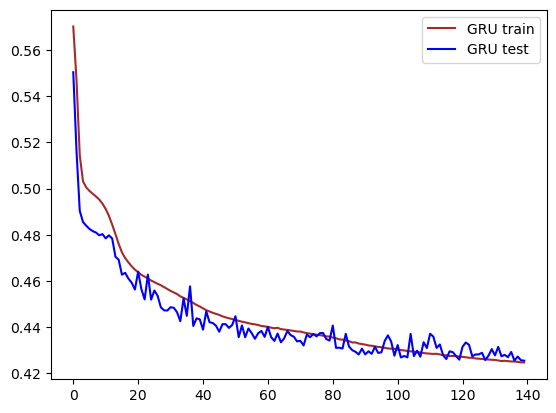

In [44]:
#dont run this cell if you are running this cell than add "validation_data=(test_X, test_y)" in model_gru.fit()
plt.plot(gru_history.history['loss'], label='GRU train', color='brown')
plt.plot(gru_history.history['val_loss'], label='GRU test', color='blue')
plt.legend()
plt.show()

In [45]:
#test_y.reshape(8086,1)
#test_y.reshape(2627,1)
#test_y=test_y[:, :1]

#train_y=test_y[:, :1]
print(test_y)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [46]:
np.shape(pred_y)

(95065, 1)

In [47]:
pred_y

array([[0.00229041],
       [0.00175953],
       [0.00053872],
       ...,
       [0.05295294],
       [0.0540244 ],
       [0.05537521]], dtype=float32)

In [49]:
#pred_y=np.reshape(pred_y,8068)
pred_y=np.reshape(pred_y,95065)

0.14229228588454554
0.23483998939359896
0.3772164973653002
0.27991002401979687


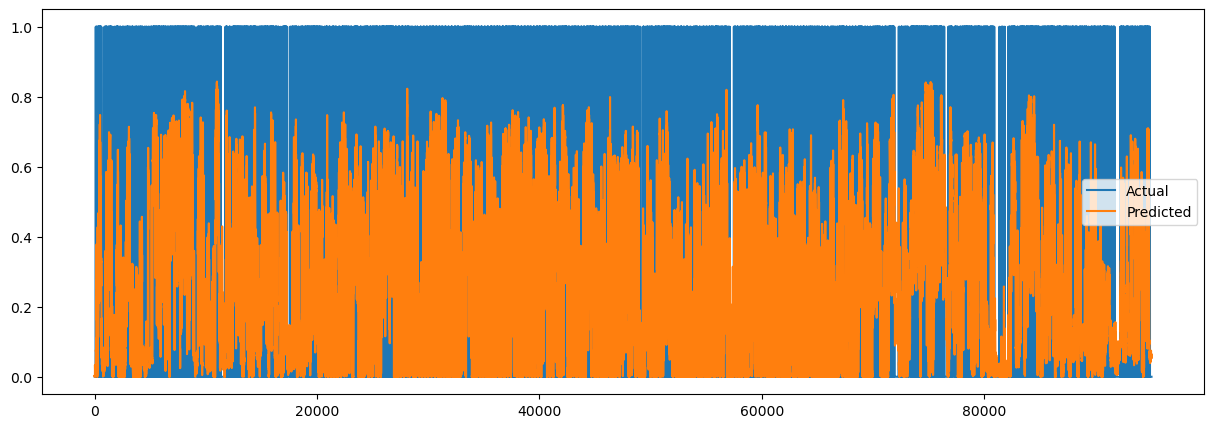

In [50]:

plt.rcParams['figure.figsize'] = (15,5)

MSE = mean_squared_error(test_y, pred_y)
R2 = r2_score(test_y, pred_y)
RMSE = sqrt(mean_squared_error(test_y, pred_y))
MAE = mean_absolute_error(test_y, pred_y)


print(MSE)
print(R2)
print(RMSE)
print(MAE)

#plotting predicted test value vs actual test value
plt.plot(test_y, label = 'Actual')
plt.plot(pred_y, label = 'Predicted')
plt.legend()
plt.show()

In [51]:
np.shape(train_X)

(380260, 12, 15)

In [52]:
np.shape(train_y)

(380260, 1)

In [53]:
np.shape(test_X)

(95065, 12, 15)

In [54]:
np.shape(test_y)

(95065, 1)

14854/14854 [==============================] - 72s 5ms/step


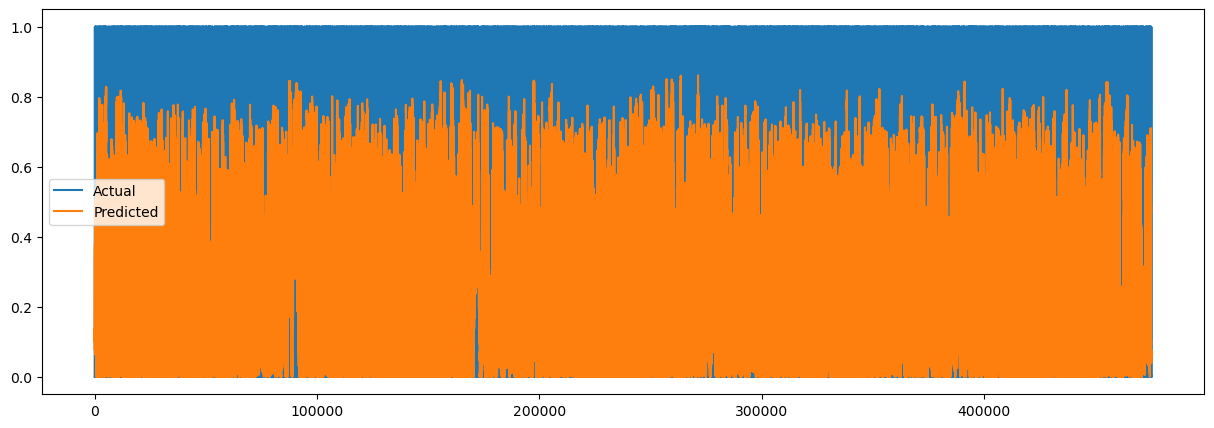

In [55]:
#visualization over full data
tra = np.concatenate([train_X,test_X])
tes = np.concatenate([train_y,test_y])
fp = model_gru.predict(tra)
plt.plot(tes, label = 'Actual')
plt.plot(fp, label = 'Predicted')
plt.legend()
plt.show()

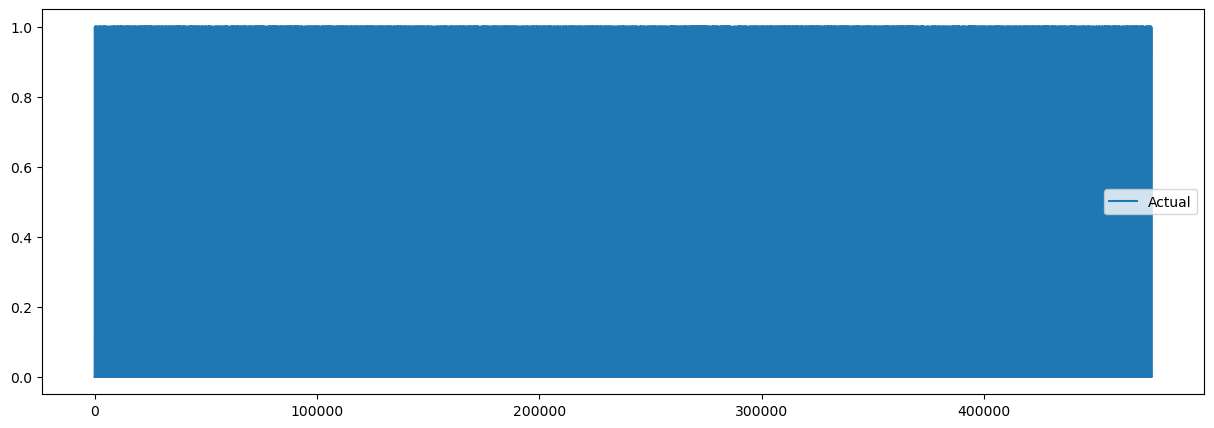

In [56]:
#over small part of data
plt.plot(tes, label = 'Actual')
#plt.plot(fp[:2000], label = 'Predicted')
plt.legend()
plt.show()

In [57]:
print(sum(tes)/len(tes))

[0.25794351]


In [58]:
#print(fp[1000:1010])
_fp = np.where(fp>0.5,1,0)
_all = sum(_fp)
_w = (_fp*tes)
print(sum(_w)/_all)
      
_all_z = sum(1-_fp)      
_w_z = (1-_fp)*(1-tes)
print(sum(_w_z)/_all_z)
print('total acc', (sum(_w)+sum(_w_z))/len(_w))

[0.61771194]
[0.81812552]
total acc [0.78314627]


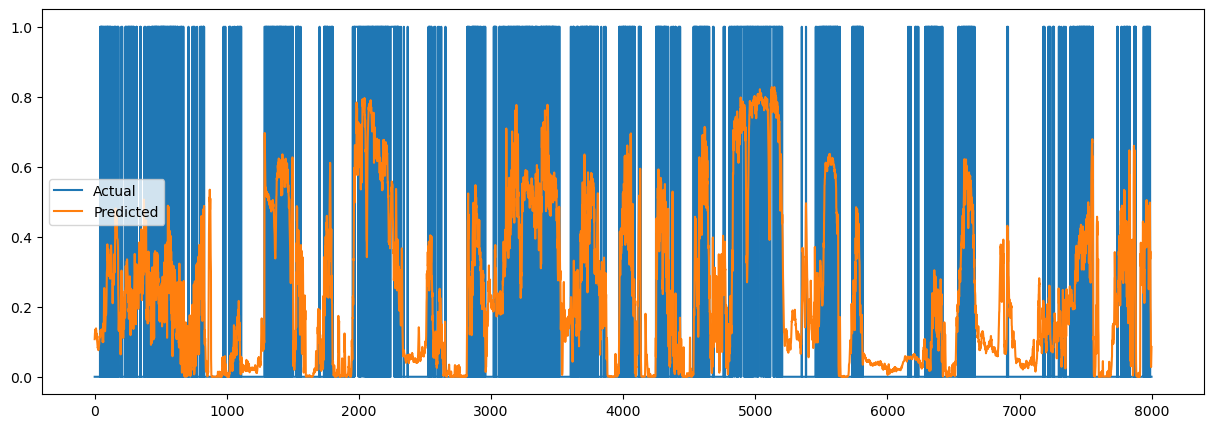

In [59]:
plt.plot(tes[:8000], label = 'Actual')
plt.plot(fp[:8000], label = 'Predicted')
plt.legend()
plt.show()

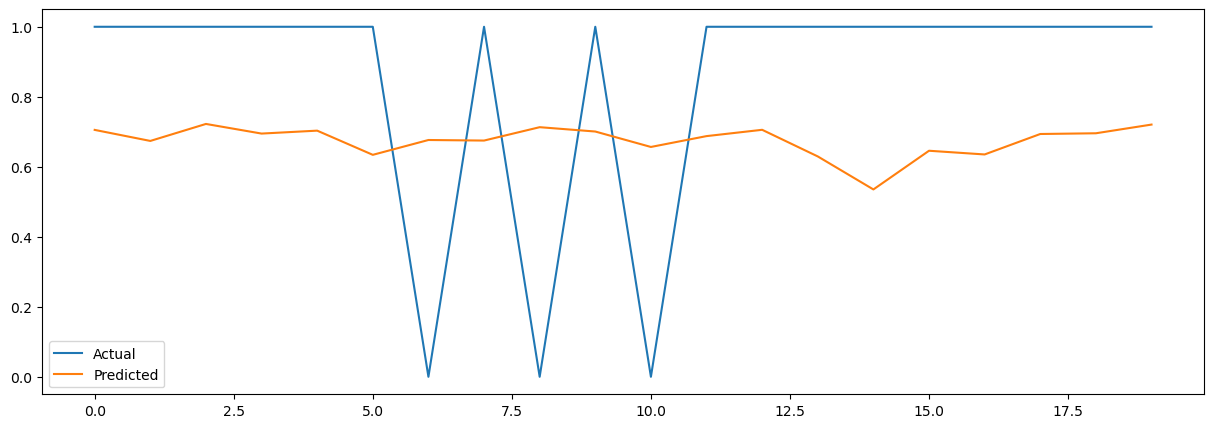

In [60]:
#over very small part of data
plt.plot(tes[2000:2020], label = 'Actual')
plt.plot(fp[2000:2020], label = 'Predicted')
plt.legend()
plt.show()

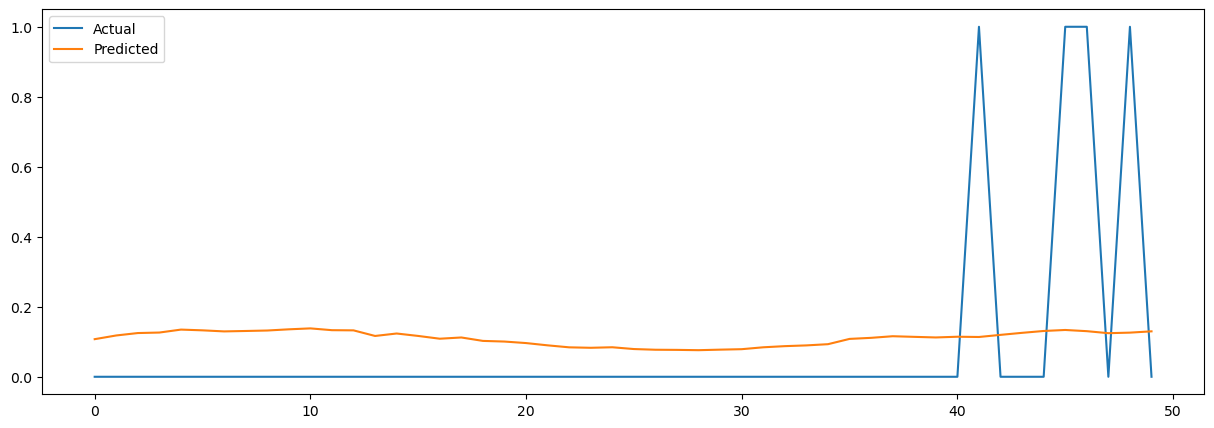

In [61]:
plt.plot(tes[:50], label = 'Actual')
plt.plot(fp[:50], label = 'Predicted')
plt.legend()
plt.show()

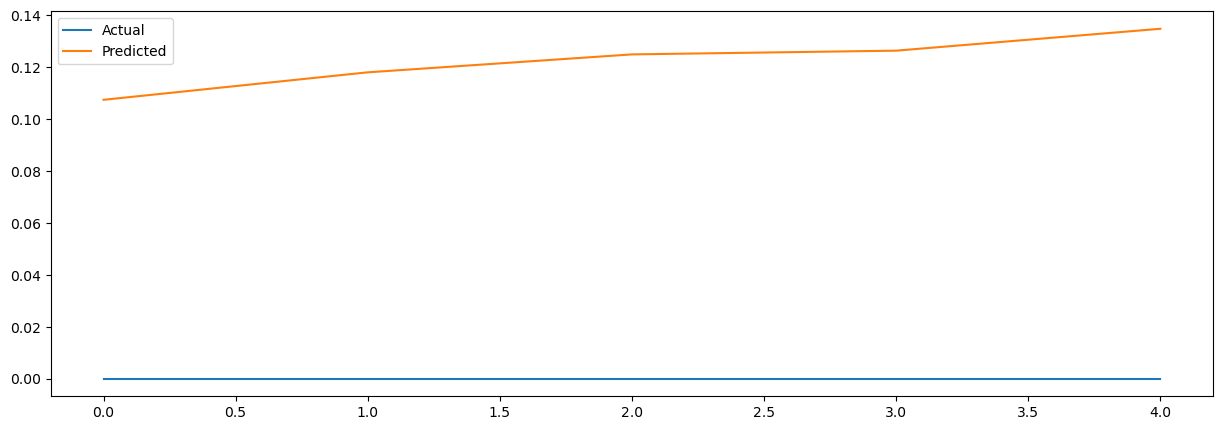

In [62]:
plt.plot(tes[:5], label = 'Actual')
plt.plot(fp[:5], label = 'Predicted')
plt.legend()
plt.show()

In [63]:
#plt.plot(scaled[3], label = 'Actual')

In [64]:
#plt.plot(scaled[2], label = 'Actual')

In [65]:
#plt.plot(scaled[1], label = 'Actual')

In [67]:
#plt.plot(scaled[0], label = 'Actual')